In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import xgboost as xgb
import seaborn as sns  

In [2]:
d = open('./student-por.csv','r')
data_lst = [line.strip('\n').replace('"','').split(';') for line in d.readlines()]
data = pd.DataFrame(data_lst, columns = data_lst[0])
pd.set_option('display.max_columns', None)
data = data.drop(index = 0)
data = data.reset_index()
data = data.apply(pd.to_numeric,errors = 'ignore')
data.set_index(["index"], inplace=True)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [3]:
x = pd.DataFrame(data,columns = ['absences', 'failures', 'Fedu', 'Fjob',
        'freetime', 'health', 'Medu', 'Mjob',
        'paid', 'reason', 'schoolsup'],)
y = data.G1


In [4]:
x = pd.DataFrame(data,columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],)
y = data.G3

In [5]:
from sklearn import preprocessing
lst = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
       'internet', 'romantic']
lbl = preprocessing.LabelEncoder()
for i in lst:
    x[i] = lbl.fit_transform(x[i].astype(str))

In [6]:
from sklearn import preprocessing
lst = ['Mjob', 'Fjob', 'reason', 'schoolsup','paid']
lbl = preprocessing.LabelEncoder()
for i in lst:
    x[i] = lbl.fit_transform(x[i].astype(str))

In [7]:
model = XGBClassifier()
model.fit(x, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [12]:
len(model.feature_importances_)

32

ValueError: shape mismatch: objects cannot be broadcast to a single shape

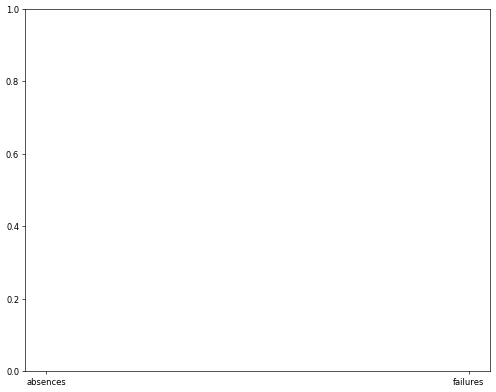

In [15]:
x_lst =['absences', 'failures', 'Fedu', 'Fjob',
        'freetime', 'health', 'Medu', 'Mjob',
        'paid', 'reason', 'schoolsup','1']
plt.figure(figsize=(10,8), dpi= 60)
plt.bar(x_lst, model.feature_importances_)
plt.gca().set_xticklabels(x_lst, rotation=60, horizontalalignment= 'right')
plt.show()

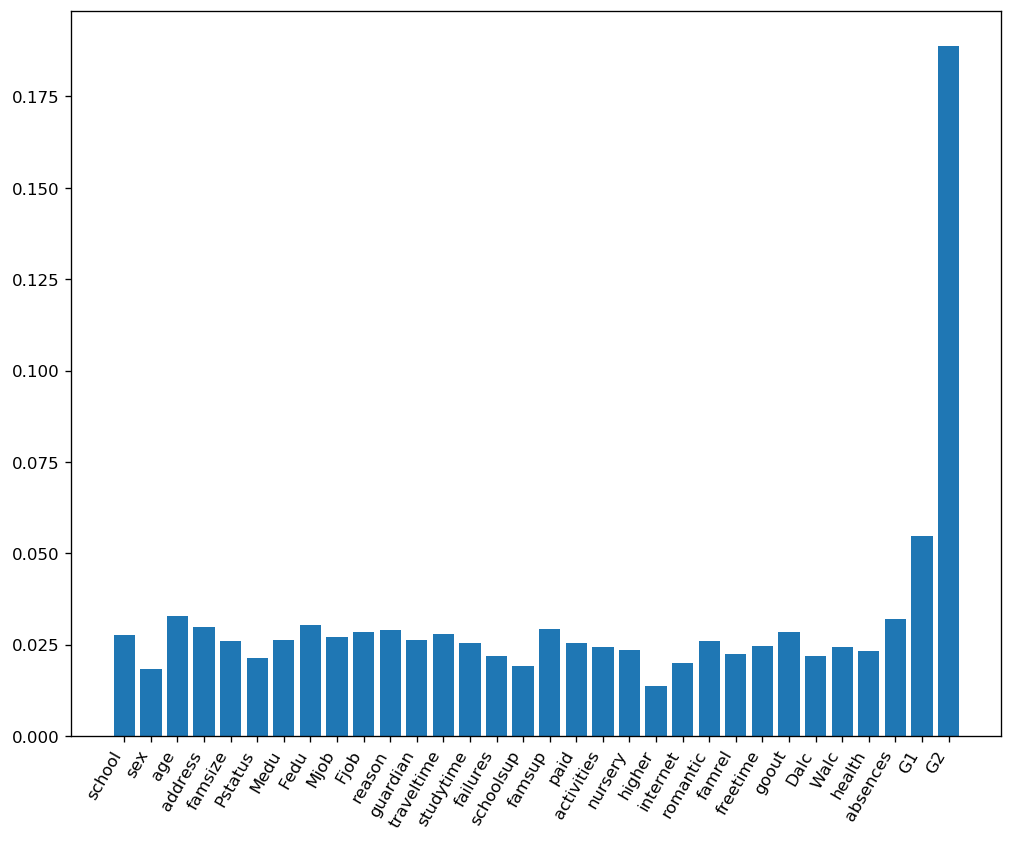

In [14]:
x_lst =['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
plt.figure(figsize=(10,8), dpi= 120)
plt.bar(x_lst, model.feature_importances_)
plt.gca().set_xticklabels(x_lst, rotation=60, horizontalalignment= 'right')
plt.show()

<Figure size 2880x2400 with 0 Axes>

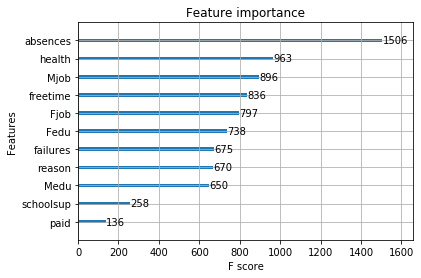

In [69]:
plt.figure(figsize=(24,20), dpi= 120)
xgb.plot_importance(model)
plt.show()

In [45]:
df = pd.read_csv("merge.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,nursery,internet,guardian.x,traveltime.x,studytime.x,failures.x,schoolsup.x,famsup.x,paid.x,activities.x,higher.x,romantic.x,famrel.x,freetime.x,goout.x,Dalc.x,Walc.x,health.x,absences.x,G1.x,G2.x,G3.x,guardian.y,traveltime.y,studytime.y,failures.y,schoolsup.y,famsup.y,paid.y,activities.y,higher.y,romantic.y,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
0,GP,F,15,R,GT3,T,1,1,at_home,other,home,yes,yes,mother,2,4,1,yes,yes,yes,yes,yes,no,3,1,2,1,1,1,2,7,10,10,mother,2,4,0,yes,yes,yes,yes,yes,no,3,1,2,1,1,1,4,13,13,13
1,GP,F,15,R,GT3,T,1,1,other,other,reputation,no,yes,mother,1,2,2,yes,yes,no,no,yes,yes,3,3,4,2,4,5,2,8,6,5,mother,1,2,0,yes,yes,no,no,yes,yes,3,3,4,2,4,5,2,13,11,11
2,GP,F,15,R,GT3,T,2,2,at_home,other,reputation,yes,no,mother,1,1,0,yes,yes,yes,yes,yes,no,4,3,1,1,1,2,8,14,13,13,mother,1,1,0,yes,yes,no,yes,yes,no,4,3,1,1,1,2,8,14,13,12
3,GP,F,15,R,GT3,T,2,4,services,health,course,yes,yes,mother,1,3,0,yes,yes,yes,yes,yes,no,4,3,2,1,1,5,2,10,9,8,mother,1,3,0,yes,yes,no,yes,yes,no,4,3,2,1,1,5,2,10,11,10
4,GP,F,15,R,GT3,T,3,3,services,services,reputation,yes,yes,other,2,3,2,no,yes,yes,yes,yes,yes,4,2,1,2,3,3,8,10,10,10,other,2,3,0,no,yes,yes,yes,yes,yes,4,2,1,2,3,3,2,13,13,13


In [4]:
import seaborn as sns  
import matplotlib.pyplot as plt 

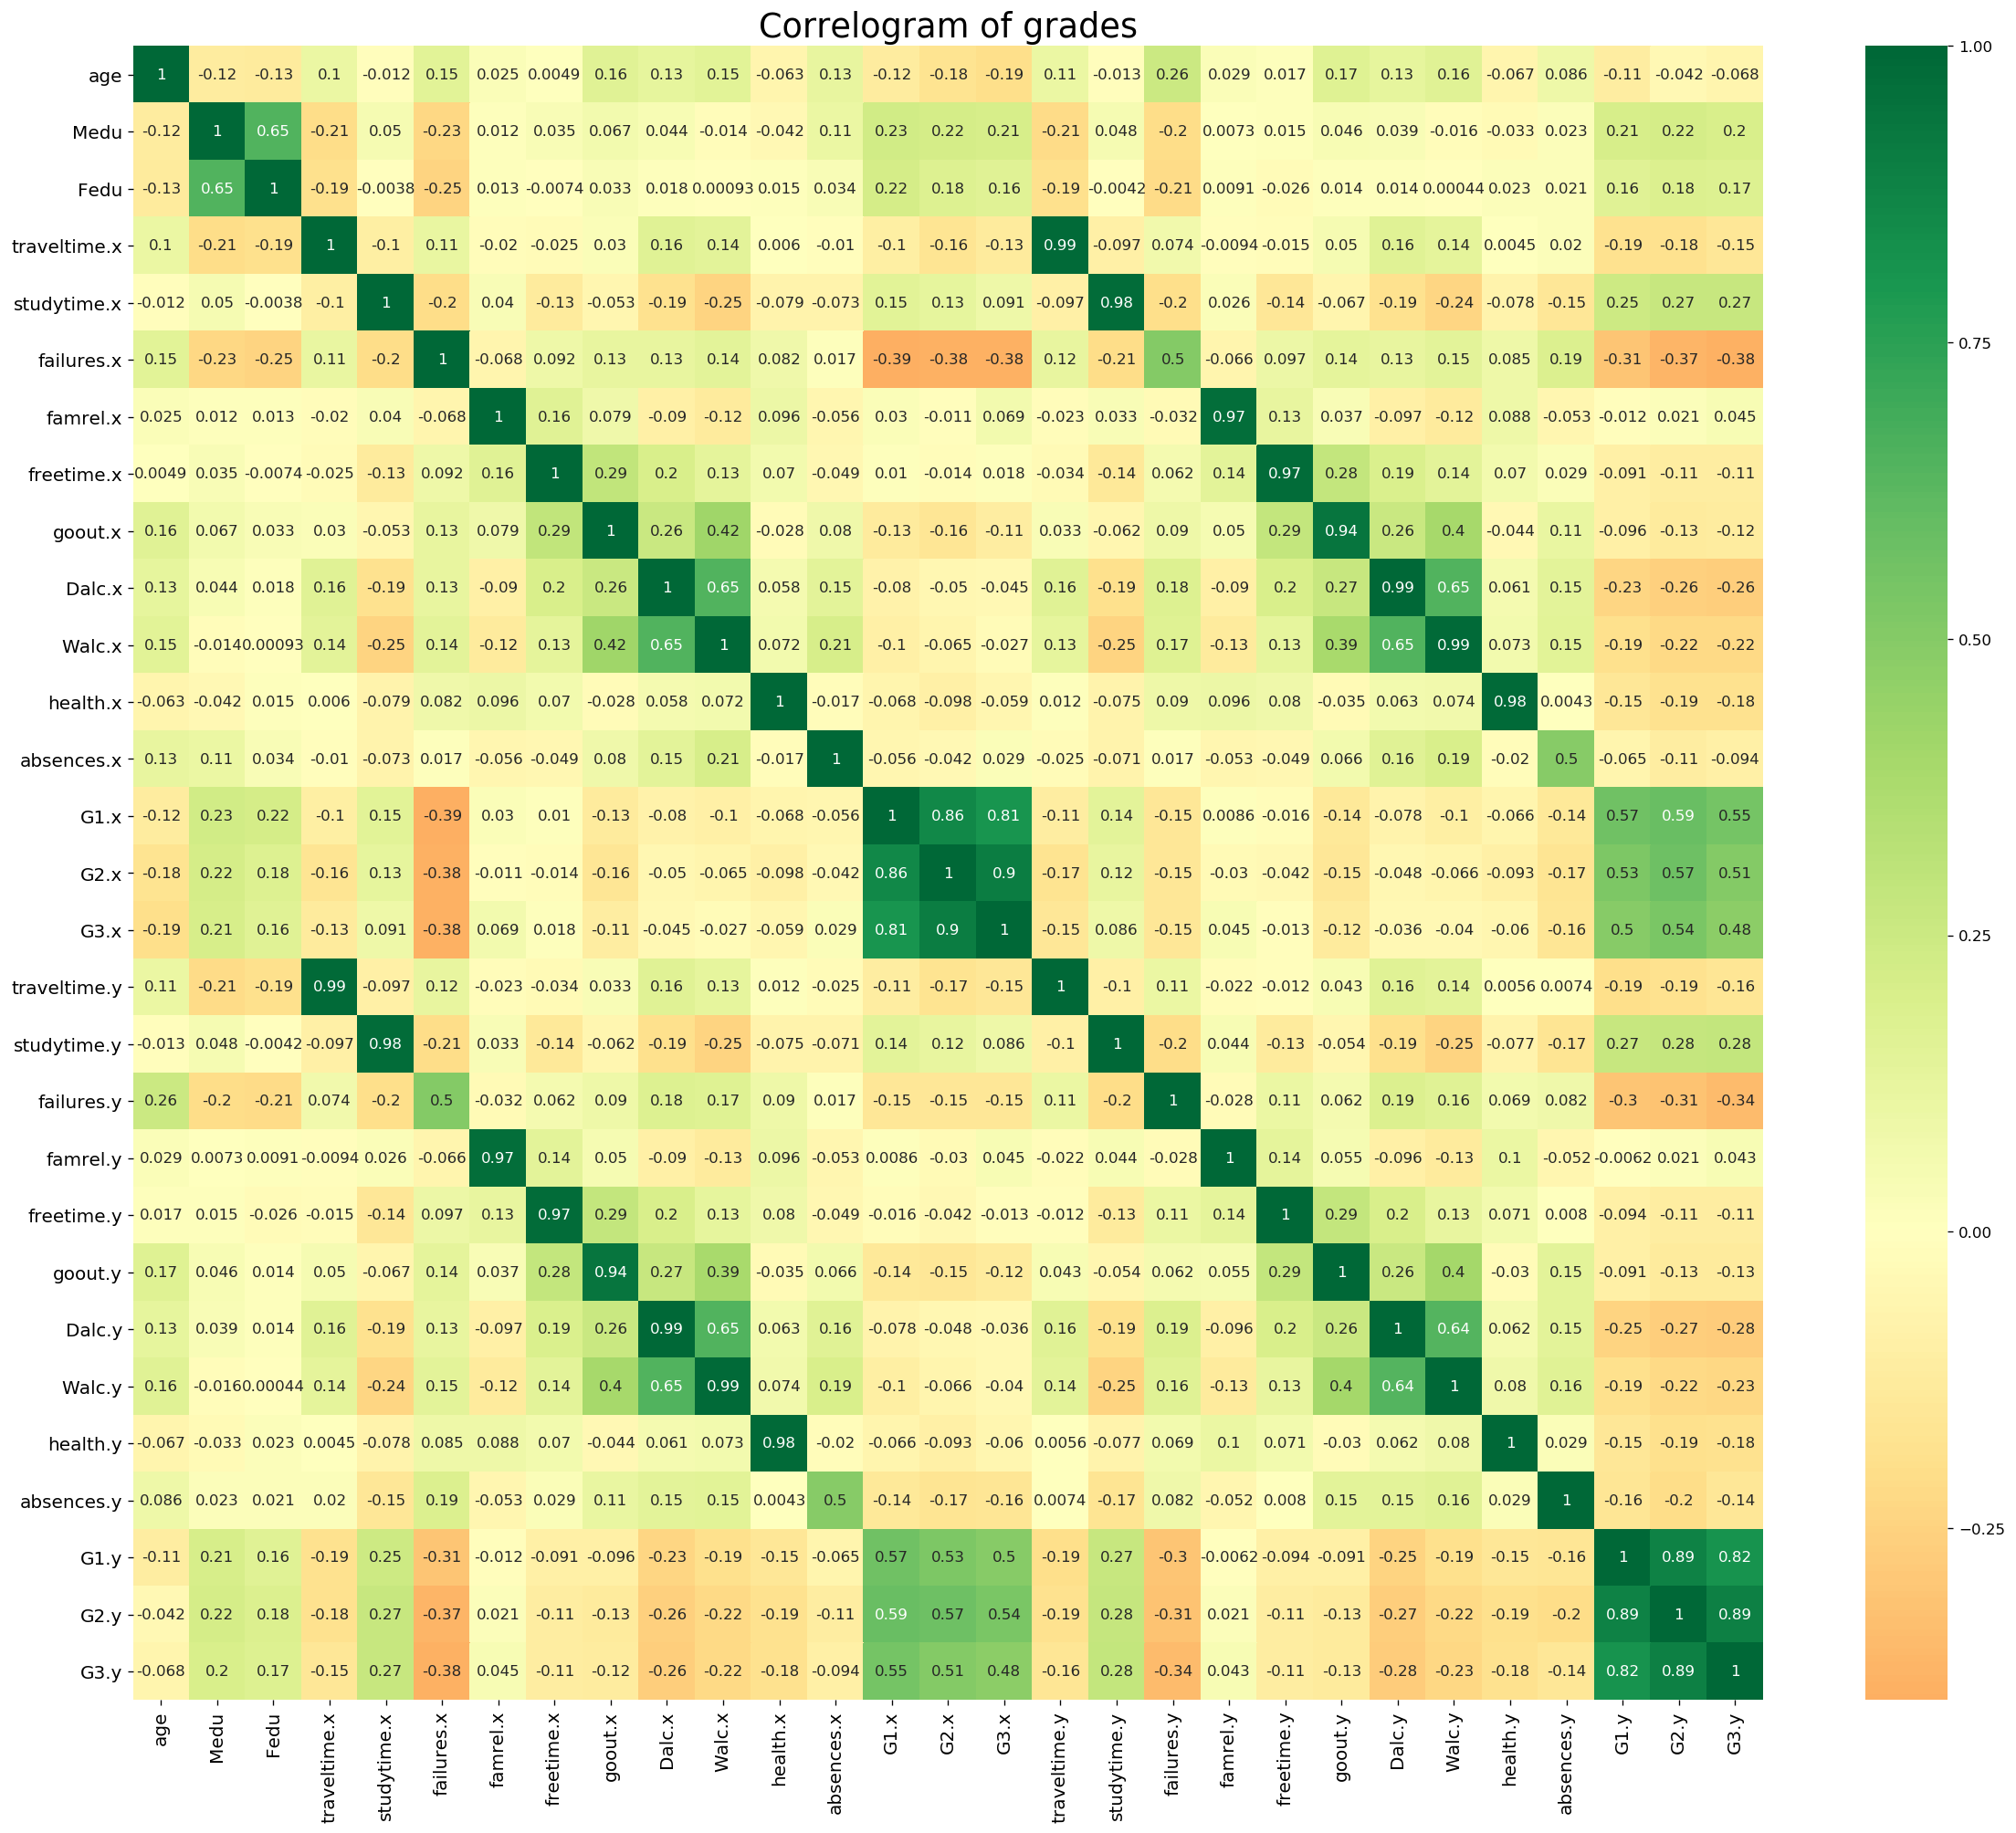

In [5]:
# Import Dataset
df = df.apply(pd.to_numeric,errors = 'ignore')
# df.head()
# Plot

plt.figure(figsize=(24,20), dpi= 120)

sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)



# Decorations

plt.title('Correlogram of grades', fontsize=22)

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)

plt.show()

D:\Program Files (x86)\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Program Files (x86)\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Program Files (x86)\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Program Files (x86)\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Program Files (x86)\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Program Files (x86)\Anaconda3\lib\site-packages\statsmodels\

ZeroDivisionError: 0.0 cannot be raised to a negative power

<Figure size 1600x1600 with 0 Axes>

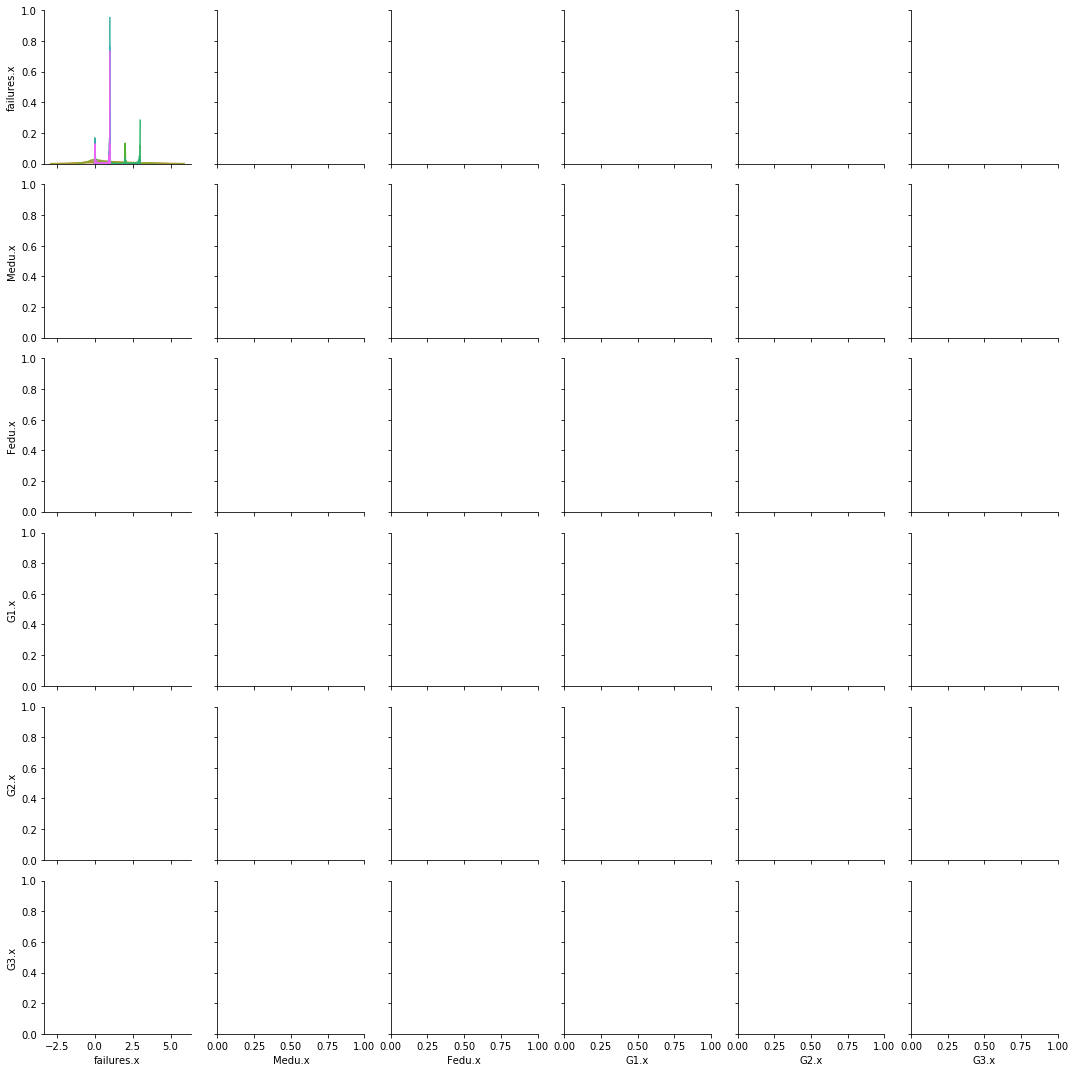

In [11]:
d = open('./student-mat.csv','r')
data_lst = [line.strip('\n').replace('"','').split(';') for line in d.readlines()]
data = pd.DataFrame(data_lst, columns = data_lst[0])
pd.set_option('display.max_columns', None)
data = data.drop(index = 0)
data = data.reset_index()
data = data.apply(pd.to_numeric,errors = 'ignore')
data.set_index(["index"], inplace=True)
data.head()

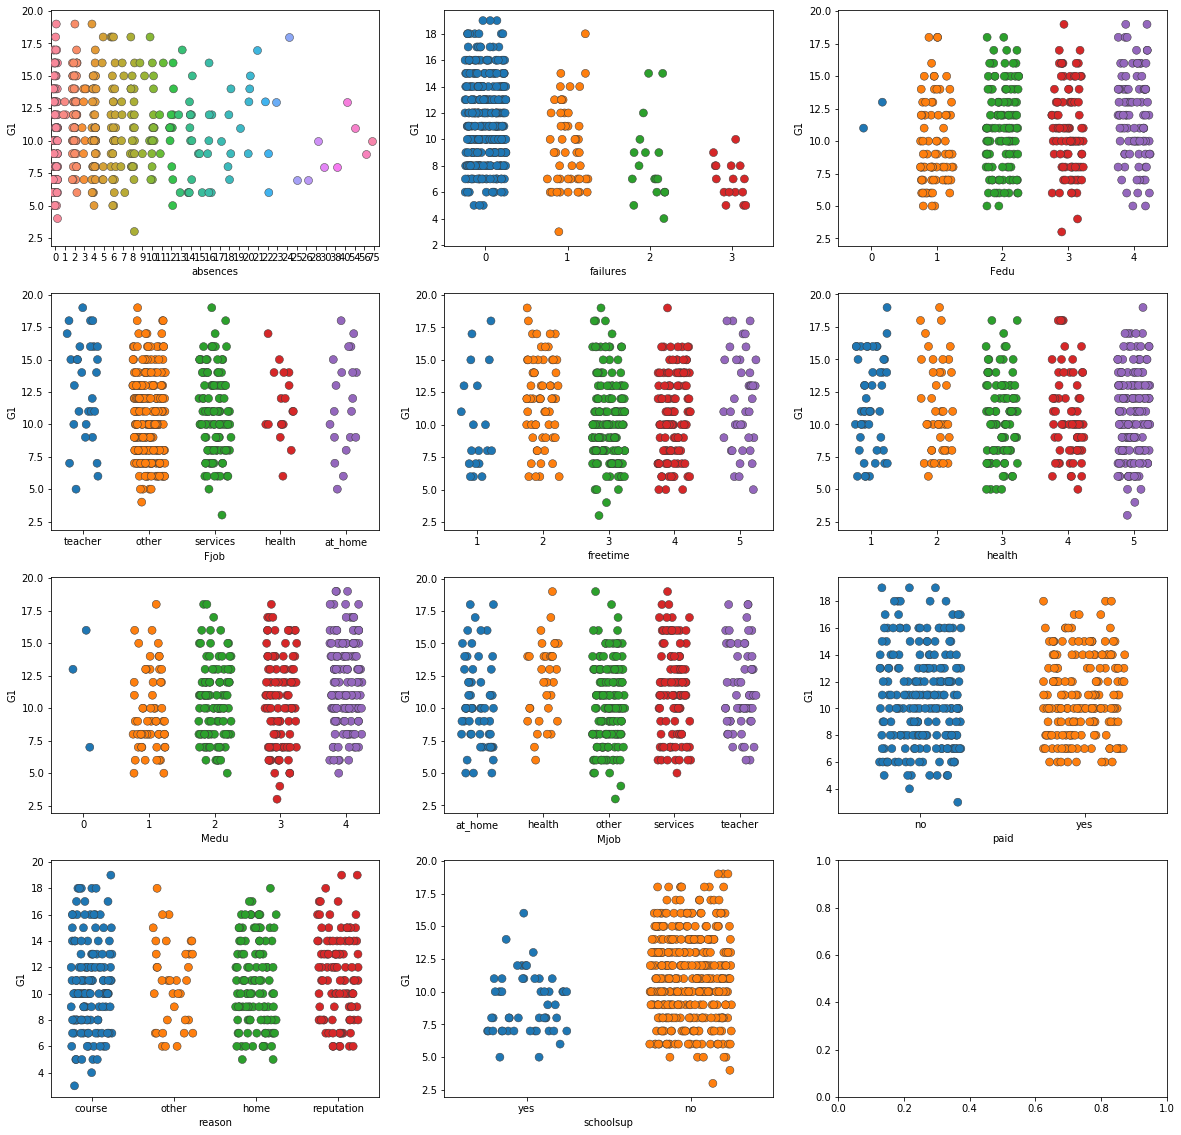

In [146]:
df = data
df = data.apply(pd.to_numeric,errors = 'ignore')
# df_counts = df.groupby(['G1', 'G3']).size().reset_index(name='counts')
# Draw Stripplot

    
fig, axarr  = plt.subplots(4,3,figsize=(20,20))

s_lst = [df.absences, df.failures, df.Fedu, df.Fjob,
df.freetime, df.health, df.Medu, df.Mjob,
df.paid, df.reason, df.schoolsup]

n = 0
m = 0
for i in s_lst:
    if m<3:
        sns.stripplot(i, df.G1, jitter=0.25, size=8, ax=axarr[n][m], linewidth=.5)
        m += 1
    else:
        n += 1
        m = 0
        sns.stripplot(i, df.G1, jitter=0.25, size=8, ax=axarr[n][m], linewidth=.5)
        m += 1


# Decorations

# plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)

plt.show()

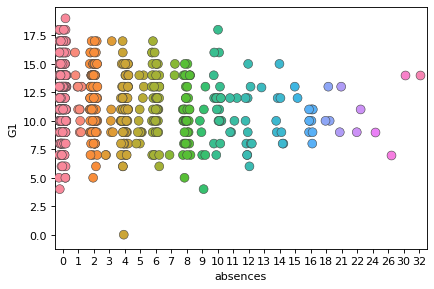

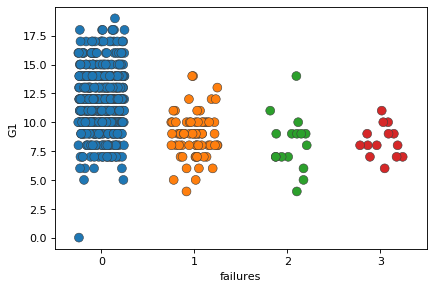

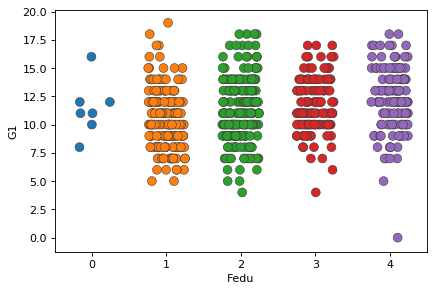

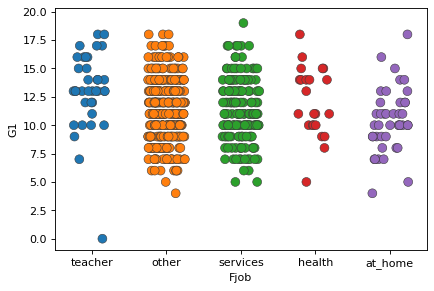

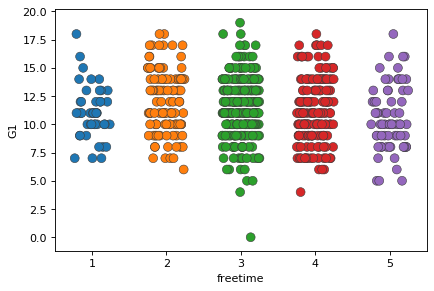

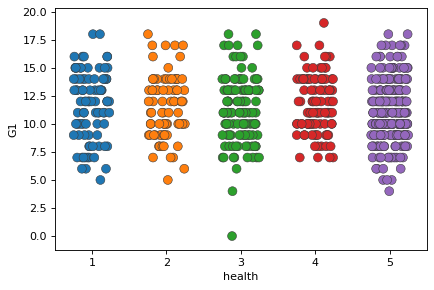

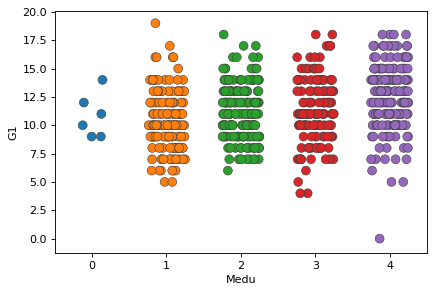

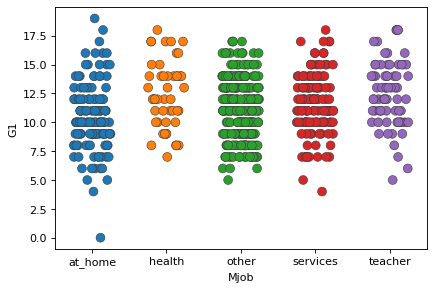

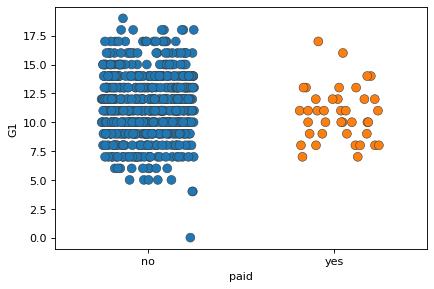

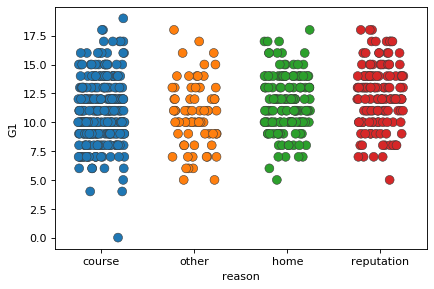

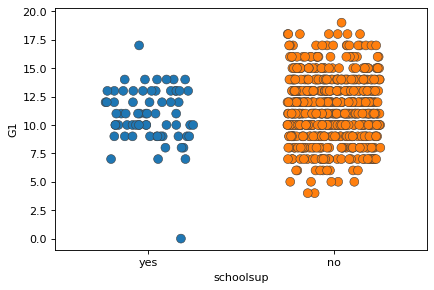

In [162]:
df = data
df = data.apply(pd.to_numeric,errors = 'ignore')
# df_counts = df.groupby(['G1', 'G3']).size().reset_index(name='counts')
# Draw Stripplot

    


s_lst = [df.absences, df.failures, df.Fedu, df.Fjob,
df.freetime, df.health, df.Medu, df.Mjob,
df.paid, df.reason, df.schoolsup]

n = 0 
for i in s_lst:
        fig, ax = plt.subplots( dpi= 80) 
        sns.stripplot(i, df.G1, jitter=0.25, size=8, ax=ax, linewidth=.5)
        n += 1
        plt.show()

# Decorations

# plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)


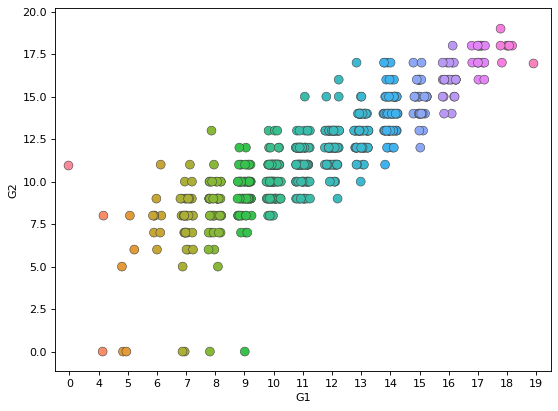

In [165]:
df = data
df = data.apply(pd.to_numeric,errors = 'ignore')
# df_counts = df.groupby(['G1', 'G3']).size().reset_index(name='counts')
# Draw Stripplot

fig, ax = plt.subplots(figsize=(8,6), dpi= 80)    

sns.stripplot(df.G1, df.G2, jitter=0.25, size=8, ax=ax, linewidth=.5)



# Decorations

# plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)

plt.show()